### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt

import plotting as plotting

### TODO: update this path

In [3]:
root = "/Users/michaelmoret/tinyverse/krap/data/24-12-06-bis/triple/NY/"

### From here; automatic run

In [4]:
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)

20241206$25^LOCX_3 NAC pos$25^LOCX_4 NAC neg$25^LOCX_6 neg$single.txt
20241206$25^NO TREATMENT CONTROL$25^LOCX_5 POS$25^LOCX_1 neg$25^LOCX_2 neg$triple.txt


In [5]:
savepath = f"{root}plots/"
os.makedirs(savepath, exist_ok=True)

In [6]:
all_dfs = []
for file in os.listdir(root):
    if file.endswith(".txt"):
        df = pd.read_csv(root + file, sep="\t")
        splitted_name = file.split("$")
        # get the experiments; i.e. not the date
        # not the single or triple
        splitted_name = splitted_name[1:-1]
        # add the experiment name in the dataframe
        all_names = []
        for entries in splitted_name:
            times_name = entries.split("^")
            _times = int(times_name[0])
            _name = times_name[1]
            all_names += [_name] * _times
        df["Name"] = all_names
        # remove nan
        df = df.dropna()
        all_dfs.append(df)
        
# merge df
df_merged = pd.concat(all_dfs)
df_merged.head(5)

,RECORD,CROSS-SECTIONAL AREA,MEAN DIAMETER,MAX DIAMETER,MIN DIAMETER,ELASTIC EMOD,ELASTIC GRADIENT,ELASTIC EXT,ELASTIC STRESS,PLATEAU LOAD,...,STRESS 25%,WORK 25%,YIELD EXT,POSTYIELD GRADIENT,BREAK EXT,BREAK LOAD,BREAK STRESS,TOTAL WORK,TOUGHNESS,Name
0,1,4174.7,78.5,95.1,55.9,4.230000e+09,59.6,3.15,0.0149,65.4,...,0.0166,0.00465,22.28,3.36,42.77,87.3,0.0209,0.00867,68900000.0,LOCX_3 NAC pos
1,2,5508.4,86.9,102.9,68.2,4.050000e+09,74.1,3.33,0.0139,80.2,...,0.0149,0.00568,28.09,4.35,53.41,113.0,0.0205,0.01390,82100000.0,LOCX_3 NAC pos
2,3,5029.6,83.7,98.4,65.1,4.060000e+09,69.4,4.14,0.0138,76.6,...,0.0159,0.00514,26.12,5.28,49.47,114.0,0.0227,0.01200,79800000.0,LOCX_3 NAC pos
4,5,3441.1,67.3,77.0,56.9,4.140000e+09,47.8,3.42,0.0148,52.0,...,0.0152,0.00366,26.17,3.00,49.97,73.0,0.0212,0.00831,79500000.0,LOCX_3 NAC pos
5,6,3898.5,73.1,85.0,58.4,4.000000e+09,52.3,3.56,0.0144,58.8,...,0.0159,0.00415,20.40,3.35,38.27,77.6,0.0199,0.00687,58100000.0,LOCX_3 NAC pos


Statistical significance between LOCX_3 NAC pos and LOCX_2 neg: p = 0.0429


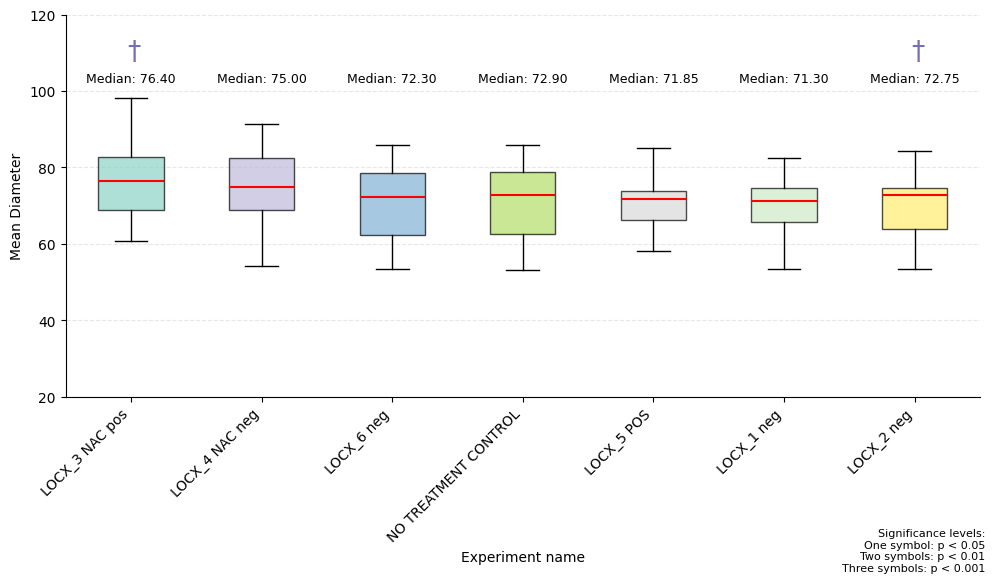

In [7]:
header = 'MEAN DIAMETER'
ymin = 20
ymax = 120
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between LOCX_3 NAC pos and LOCX_4 NAC neg: p = 0.0496
Statistical significance between LOCX_3 NAC pos and NO TREATMENT CONTROL: p = 0.0279
Statistical significance between LOCX_3 NAC pos and LOCX_1 neg: p = 0.0365
Statistical significance between LOCX_1 neg and LOCX_2 neg: p = 0.0451


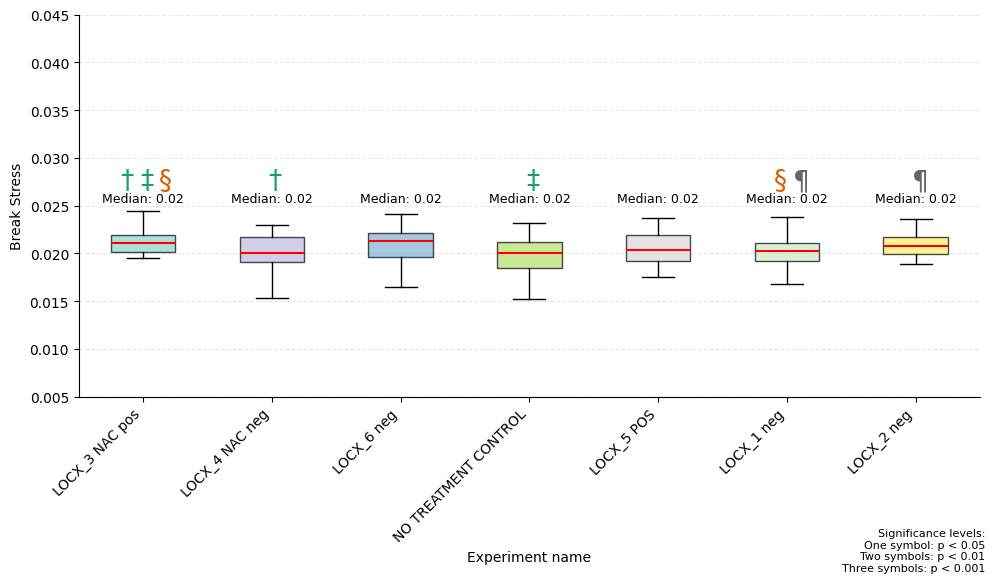

In [8]:
header = 'BREAK STRESS'
ymin = 0.005
ymax = 0.045
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between LOCX_4 NAC neg and LOCX_5 POS: p = 0.0077


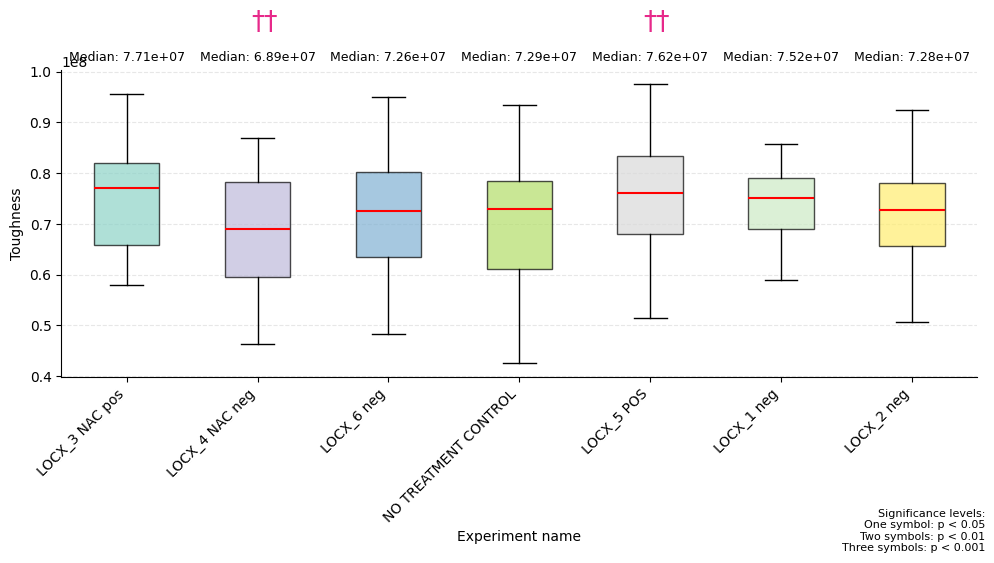

In [9]:
header = 'TOUGHNESS'
ymin = None
ymax = None
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between LOCX_3 NAC pos and NO TREATMENT CONTROL: p = 0.0306
Statistical significance between LOCX_3 NAC pos and LOCX_2 neg: p = 0.0206


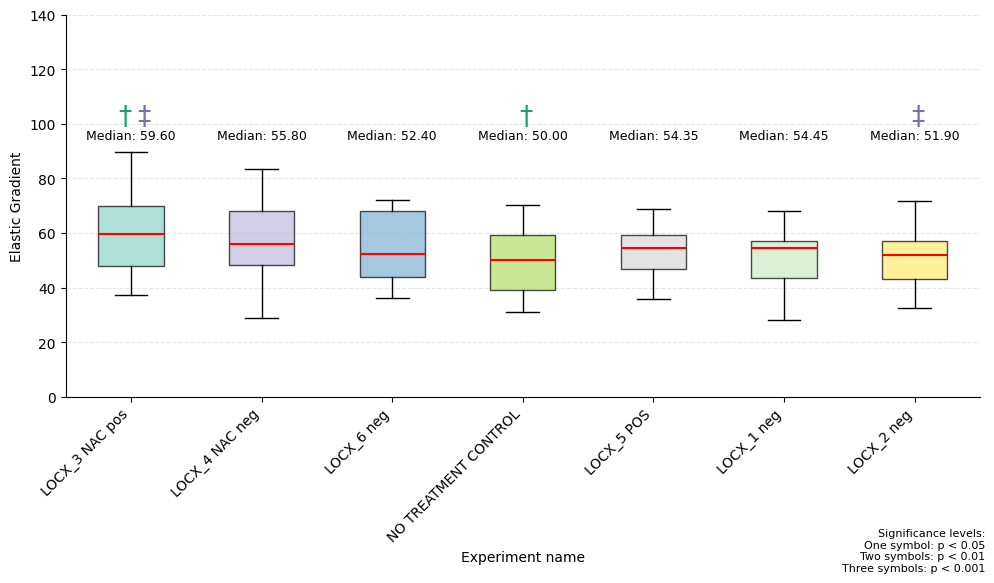

In [10]:
header = 'ELASTIC GRADIENT'
ymin = 0
ymax =  140
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between LOCX_3 NAC pos and LOCX_6 neg: p = 0.0246
Statistical significance between LOCX_4 NAC neg and NO TREATMENT CONTROL: p = 0.0376
Statistical significance between LOCX_6 neg and NO TREATMENT CONTROL: p = 0.0095


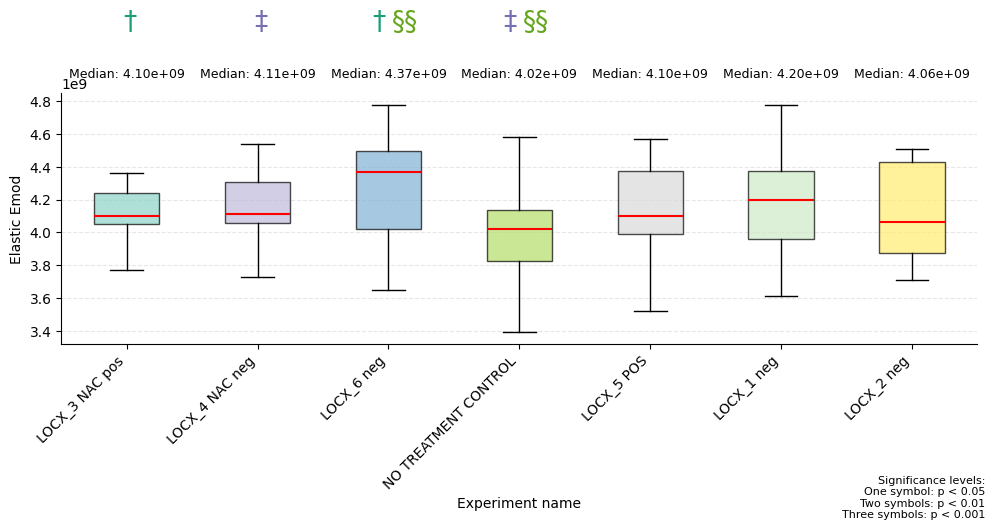

In [11]:
header = 'ELASTIC EMOD'
ymin = None
ymax =  None
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()